In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
df_raw = pd.read_csv('C:/Users/lode/Downloads/data_science/mobile_price_dataset/train.csv')

In [25]:
df = df_raw.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [27]:
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [28]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [29]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [30]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [31]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x18b65453ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b65b12580>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b65453a90>,
 'medians': [<matplotlib.lines.Line2D at 0x18b65b12ca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b65b1f070>,
 'means': []}

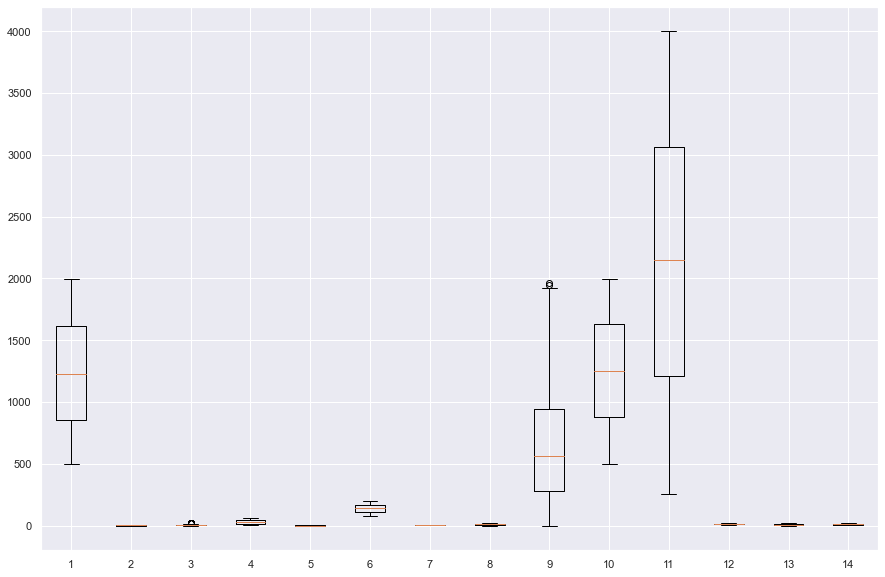

In [32]:
plt.figure(figsize = (15, 10))
plt.boxplot([df['battery_power'], df['clock_speed'], df['fc'], df['int_memory'],
           df['m_dep'], df['mobile_wt'], df['n_cores'], df['pc'], df['px_height'],
            df['px_width'], df['ram'], df['sc_h'], df['sc_w'], df['talk_time']])

#There are no outliers that can affect our analysis

In [33]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif['Features'] = variables.columns

In [35]:
vif
#i'll drop the columns that contains vif value above 7 to avoid multicollinearity

,VIF,Features
0,7.953793,battery_power
1,4.230906,clock_speed
2,3.406797,fc
3,3.929899,int_memory
4,3.901351,m_dep
5,12.526344,mobile_wt
6,4.593203,n_cores
7,6.217410,pc
8,4.238915,px_height
9,11.561984,px_width


In [36]:
df_cleaned = df.drop(['mobile_wt', 'px_width', 'sc_h'], axis = 1)
df_cleaned.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,2,2,20,2549,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,2631,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,2769,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1411,2,15,1,1,0,1


In [37]:
targets = df_cleaned['price_range']
unscaled_inputs = df_cleaned.drop(['price_range'], axis = 1)

In [38]:
unscaled_inputs

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,2,2,20,2549,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,2631,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,2603,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,2769,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1411,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,6,14,1222,668,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,4,3,915,2032,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,8,3,868,3057,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,5,5,336,869,10,19,1,1,1


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(unscaled_inputs)

StandardScaler()

In [40]:
scaled_inputs = scaler.transform(unscaled_inputs)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state = 20)

In [42]:
print(x_train.shape, y_train.shape)

(1600, 17) (1600,)


In [43]:
print(x_test.shape, y_test.shape)

(400, 17) (400,)


In [44]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(x_train, y_train)

LogisticRegression()

In [45]:
reg.score(x_train, y_train)

0.918125

In [46]:
y_train

1500    2
451     1
1627    3
669     1
1567    1
       ..
924     2
1247    1
271     0
474     2
1379    1
Name: price_range, Length: 1600, dtype: int64

In [47]:
reg.predict(x_train)

array([2, 1, 2, ..., 0, 2, 1], dtype=int64)

In [48]:
np.sum(reg.predict(x_train) == y_train)

1469

In [49]:
np.sum(reg.predict(x_train) == y_train) / x_train.shape[0]

0.918125

In [50]:
reg.intercept_

array([-3.16127366,  2.93716006,  2.89334205, -2.66922846])

In [51]:
reg.coef_

array([[-2.58500401e+00,  3.30136599e-02,  6.92232924e-02,
         9.39632245e-02, -1.31293565e-01, -2.08725841e-02,
        -1.71199318e-01,  6.27612088e-02,  1.36656151e-02,
         2.53219171e-02, -2.15434265e+00, -1.01243816e+01,
        -9.73907536e-02, -7.08978190e-02, -2.52930535e-02,
         1.40912800e-01,  1.39567684e-01],
       [-8.08854616e-01,  3.92324889e-02,  1.00473874e-02,
        -1.49661261e-02, -8.81124360e-04,  2.99845084e-02,
        -4.48662127e-02,  3.67690816e-02, -1.21341277e-01,
        -3.52991593e-02, -6.82479576e-01, -3.03907387e+00,
        -1.00249824e-01, -8.43600475e-02, -6.83393759e-02,
         1.46987347e-03,  2.75109399e-02],
       [ 8.00668014e-01,  1.53736159e-03, -1.52024785e-02,
        -2.77651826e-02,  1.45881624e-01, -2.09679847e-02,
        -1.01187661e-01, -9.29427310e-03,  2.45564099e-02,
        -3.18288471e-02,  6.37326310e-01,  3.24723668e+00,
         3.72785722e-02,  1.05482247e-02,  5.79511798e-02,
        -1.14207529e-01, -1.0

### TESTING THE MODEL

In [53]:
df_test = pd.read_csv('C:/Users/lode/Downloads/data_science/mobile_price_dataset/test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [54]:
df_test = df_test.drop(['id', 'mobile_wt', 'px_width', 'sc_h'], axis = 1)

In [55]:
scaler.fit(df_test)

StandardScaler()

In [56]:
scaled_test = scaler.transform(df_test)

In [57]:
price_prediction = reg.predict(scaled_test)
price_prediction

array([2, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 0, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 2, 1, 1, 3, 2, 0, 2, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,